# Multiple Linear Regression Assignment
## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

# Reading and Understanding the Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
bike_data = pd.read_csv(r"C:\Users\Aditi Saini\OneDrive\Desktop\PGDDS projects\ML datasets\day.csv")

In [3]:
# First 5 rows
bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Checking columns having null values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Describing the data
bike_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
bike_data.shape

(730, 16)

In [7]:
# Dropping columns that are not required
bike_data.drop(['instant','dteday'], axis=1, inplace = True)

In [8]:
# Assigning string values to categorical columns having numeric values
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
bike_data['mnth'] = bike_data['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [10]:
bike_data['weekday'] = bike_data['weekday'].map({1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat', 0:'sun'})

In [11]:
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [12]:
bike_data.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1       Mist  14.110847   
1  spring   0  jan        0     tue           1       Mist  14.902598   
2  spring   0  jan        0     wed           1      Clear   8.050924   
3  spring   0  jan        0     thu           1      Clear   8.200000   
4  spring   0  jan        0     fri           1      Clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [13]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


# Visualising the Data

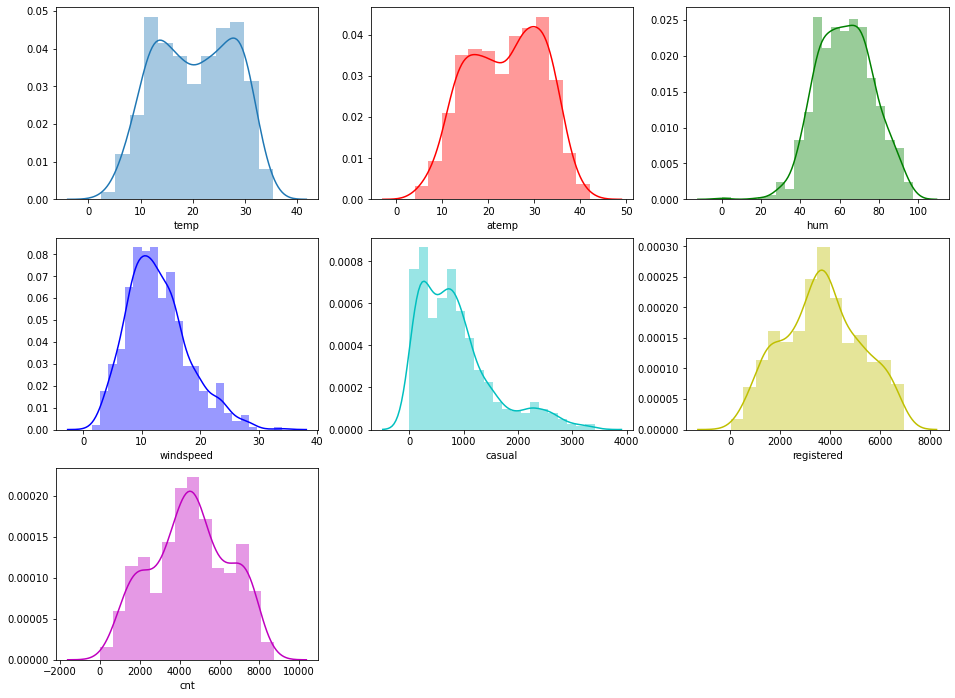

In [14]:
# Plotting distribution of numeric features to check multicollinearity
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.distplot(bike_data.temp)
plt.subplot(3,3,2)
sns.distplot(bike_data.atemp, color='r')
plt.subplot(3,3,3)
sns.distplot(bike_data.hum, color='g')
plt.subplot(3,3,4)
sns.distplot(bike_data.windspeed, color='b')
plt.subplot(3,3,5)
sns.distplot(bike_data.casual,color='c')
plt.subplot(3,3,6)
sns.distplot(bike_data.registered, color='y')
plt.subplot(3,3,7)
sns.distplot(bike_data.cnt, color='m')
plt.show()

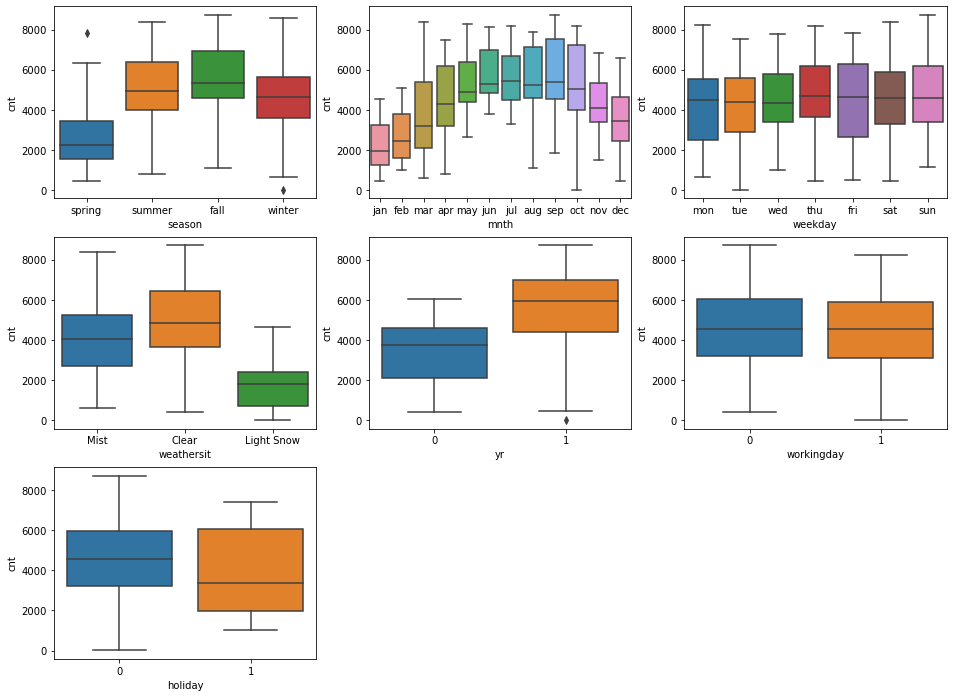

In [15]:
# Plotting categorical features
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.boxplot('season', 'cnt', data=bike_data)
plt.subplot(3,3,2)
sns.boxplot('mnth', 'cnt', data=bike_data)
plt.subplot(3,3,3)
sns.boxplot('weekday', 'cnt', data=bike_data)
plt.subplot(3,3,4)
sns.boxplot('weathersit', 'cnt', data=bike_data)
plt.subplot(3,3,5)
sns.boxplot('yr', 'cnt', data=bike_data)
plt.subplot(3,3,6)
sns.boxplot('workingday', 'cnt', data=bike_data)
plt.subplot(3,3,7)
sns.boxplot('holiday', 'cnt', data=bike_data)
plt.show()

In [16]:
# Defining numerical features
num_var = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

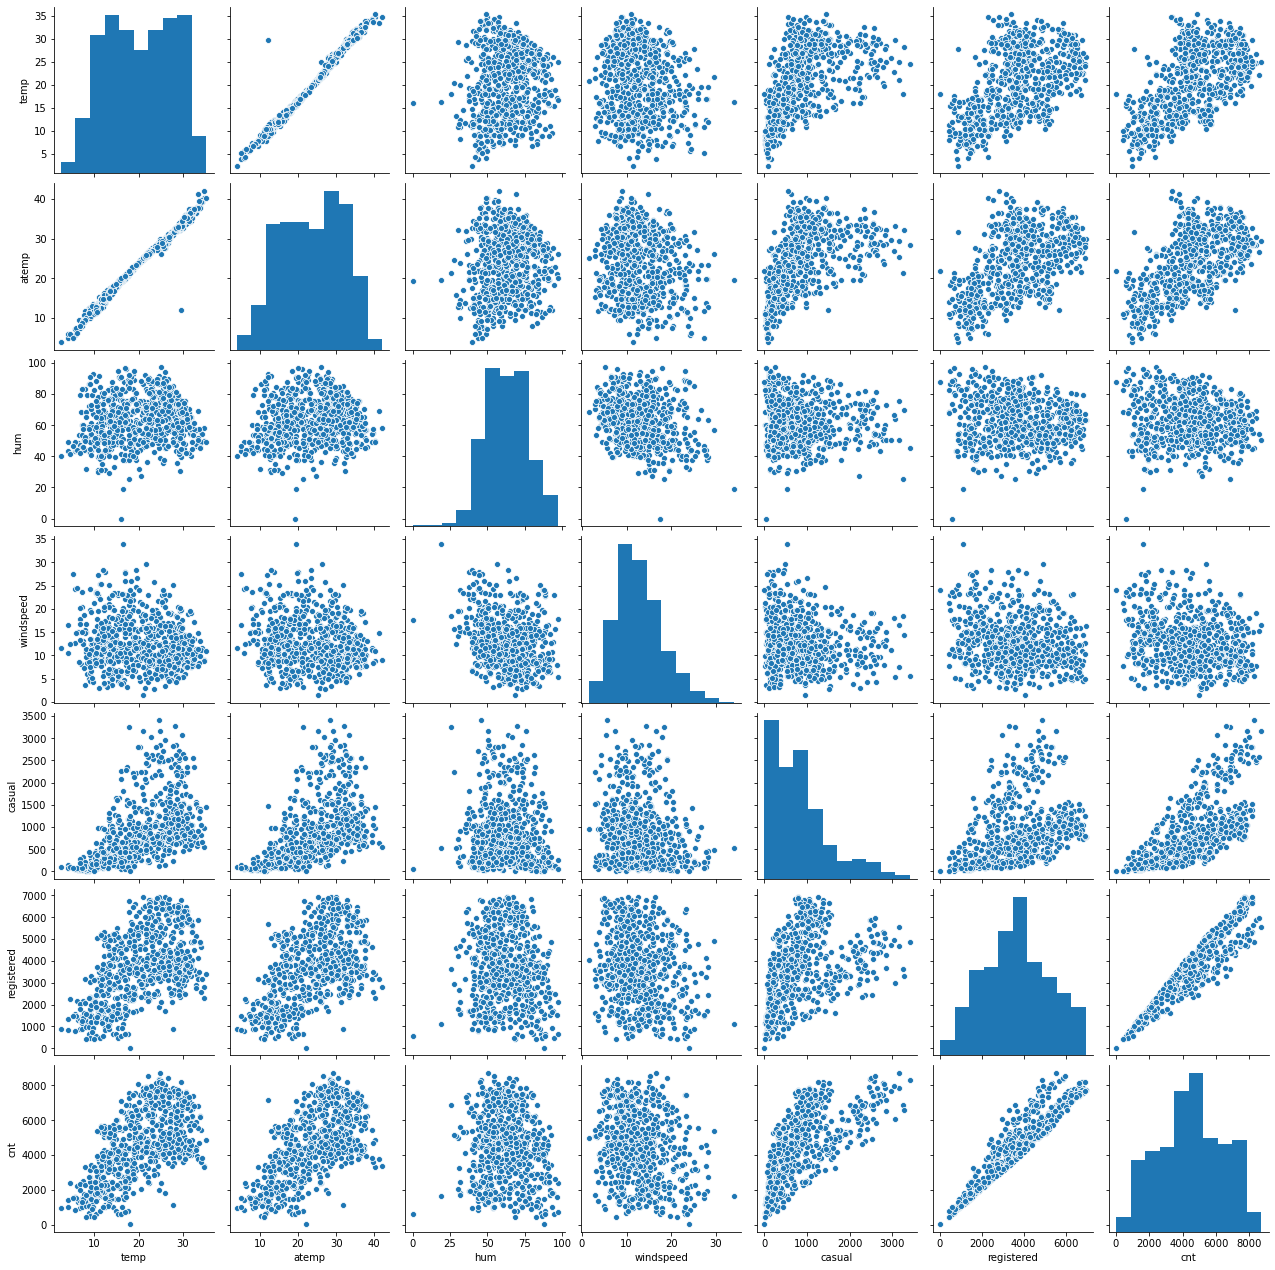

In [17]:
# Plotting pairplot
sns.pairplot(bike_data[num_var])

In [18]:
bike_data.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
casual      0.250502  0.054055   -0.090369  0.542731  0.543362 -0.075211   
registered  0.596911 -0.109142    0.005466  0.539436  0.543678 -0.089212   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed    casual  registered       cnt  
yr          -0.011624  0.250502    0.596911  0.569728  
holiday      0.006257  0.054055   -0.109142 -0.068764  
workingday  -0.002453 -0.090369    0.005466 -0.027640  
temp        -0.158186  0.542731    0.539436  0.627044  
atemp       -0.183876  0.543362    0.543678  0.630685  
hum         -0.248506 -0.075211   -0.089212 -0.098543  
windspeed    1.000000 -0.167995   -0.217914 -0.235132  
casual      -0.167995  1.000000    0.394137  0.672123  
registered  -0.217914  0.394137    1.000000  0.945411  
cnt         -0.235132  0.672123    0.945411  1.000000

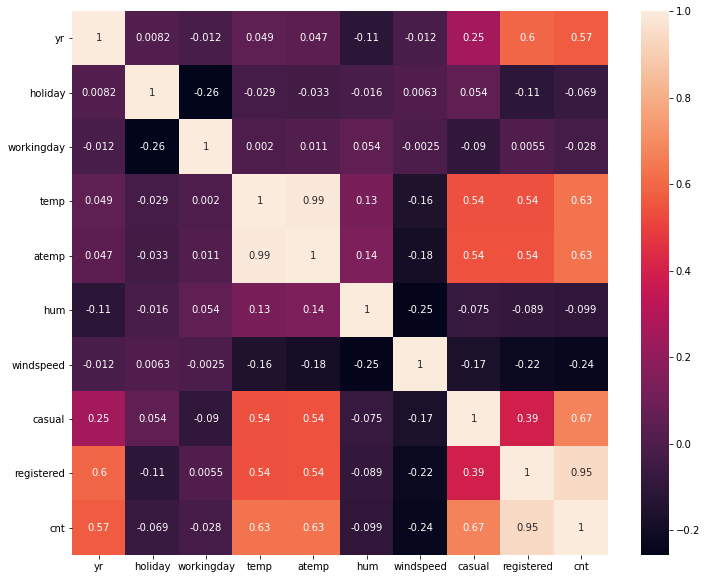

In [19]:
# Plotting heatmap
plt.figure(figsize=(12,10))
sns.heatmap(bike_data.corr(), annot=True)

Temp and atemp seems to have high correlation. So it's better to drop one of the feature.

Cnt have high correaltion with casual and registered. Also both sum up together to give cnt features(target variable). So, we should drop both of them.

In [20]:
bike_data.drop(['atemp'], axis=1, inplace=True)

In [21]:
bike_data.drop(['casual','registered'], axis=1, inplace=True)

In [22]:
cat_var = bike_data.select_dtypes('object')

In [23]:
# Creating Dummy Variables and dropping one dummy column from each categorical feature 
bike_new = pd.get_dummies(cat_var, drop_first=True)

In [24]:
bike_new.head()

season_spring  season_summer  season_winter  mnth_aug  mnth_dec  mnth_feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  mnth_oct  mnth_sep  \
0         1         0         0         0  ...         0         0   
1         1         0         0         0  ...         0         0   
2         1         0         0         0  ...         0         0   
3         1         0         0         0  ...         0         0   
4         1         0         0         0  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_wed  weathersit_Light Snow  weathersit_Mist  
0            0                      0                1  
1            0                      0                1  
2            1                      0                0  
3            0                      0                0  
4            0                      0                0  

[5 rows x 22 columns]

In [25]:
# Concatenating both dataframes
bike_data = pd.concat([bike_data, bike_new], axis=1)

In [26]:
# Dropping the categorical features for which dummy variables are created
bike_data.drop(bike_data[cat_var.columns], axis=1, inplace=True)

In [27]:
bike_data.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
0   0        0           1  14.110847  80.5833  10.749882   985   
1   0        0           1  14.902598  69.6087  16.652113   801   
2   0        0           1   8.050924  43.7273  16.636703  1349   
3   0        0           1   8.200000  59.0435  10.739832  1562   
4   0        0           1   9.305237  43.6957  12.522300  1600   

   season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
0              1              0              0  ...         0         0   
1              1              0              0  ...         0         0   
2              1              0              0  ...         0         0   
3              1              0              0  ...         0         0   
4              1              0              0  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_wed  weathersit_Light Snow  weathersit_Mist  
0            0                      0                1  
1            0                      0                1  
2            1                      0                0  
3            0                      0                0  
4            0                      0                0  

[5 rows x 29 columns]

# Model Building

In [28]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_var = ['temp','hum','windspeed','cnt']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [30]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt  season_spring  season_summer  season_winter  ...  \
count  510.000000     510.000000     510.000000      510.00000  ...   
mean     0.513620       0.243137       0.245098        0.24902  ...   
std      0.224593       0.429398       0.430568        0.43287  ...   
min      0.000000       0.000000       0.000000        0.00000  ...   
25%      0.356420       0.000000       0.000000        0.00000  ...   
50%      0.518638       0.000000       0.000000        0.00000  ...   
75%      0.684710       0.000000       0.000000        0.00000  ...   
max      1.000000       1.000000       1.000000        1.00000  ...   

         mnth_oct    mnth_sep  weekday_mon  weekday_sat  weekday_sun  \
count  510.000000  510.000000   510.000000   510.000000   510.000000   
mean     0.086275    0.080392     0.154902     0.129412     0.137255   
std      0.281045    0.272166     0.362166     0.335985     0.344454   
min      0.000000    0.000000     0.000000     0.000000     0.000000   
25%      0.000000    0.000000     0.000000     0.000000     0.000000   
50%      0.000000    0.000000     0.000000     0.000000     0.000000   
75%      0.000000    0.000000     0.000000     0.000000     0.000000   
max      1.000000    1.000000     1.000000     1.000000     1.000000   

       weekday_thu  weekday_tue  weekday_wed  weathersit_Light Snow  \
count   510.000000   510.000000   510.000000             510.000000   
mean      0.143137     0.152941     0.135294               0.029412   
std       0.350557     0.360284     0.342373               0.169124   
min       0.000000     0.000000     0.000000               0.000000   
25%       0.000000     0.000000     0.000000               0.000000   
50%       0.000000     0.000000     0.000000               0.000000   
75%       0.000000     0.000000     0.000000               0.000000   
max       1.000000     1.000000     1.000000               1.000000   

       weathersit_Mist  
count       510.000000  
mean          0.343137  
std           0.475223  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  

[8 rows x 29 columns]

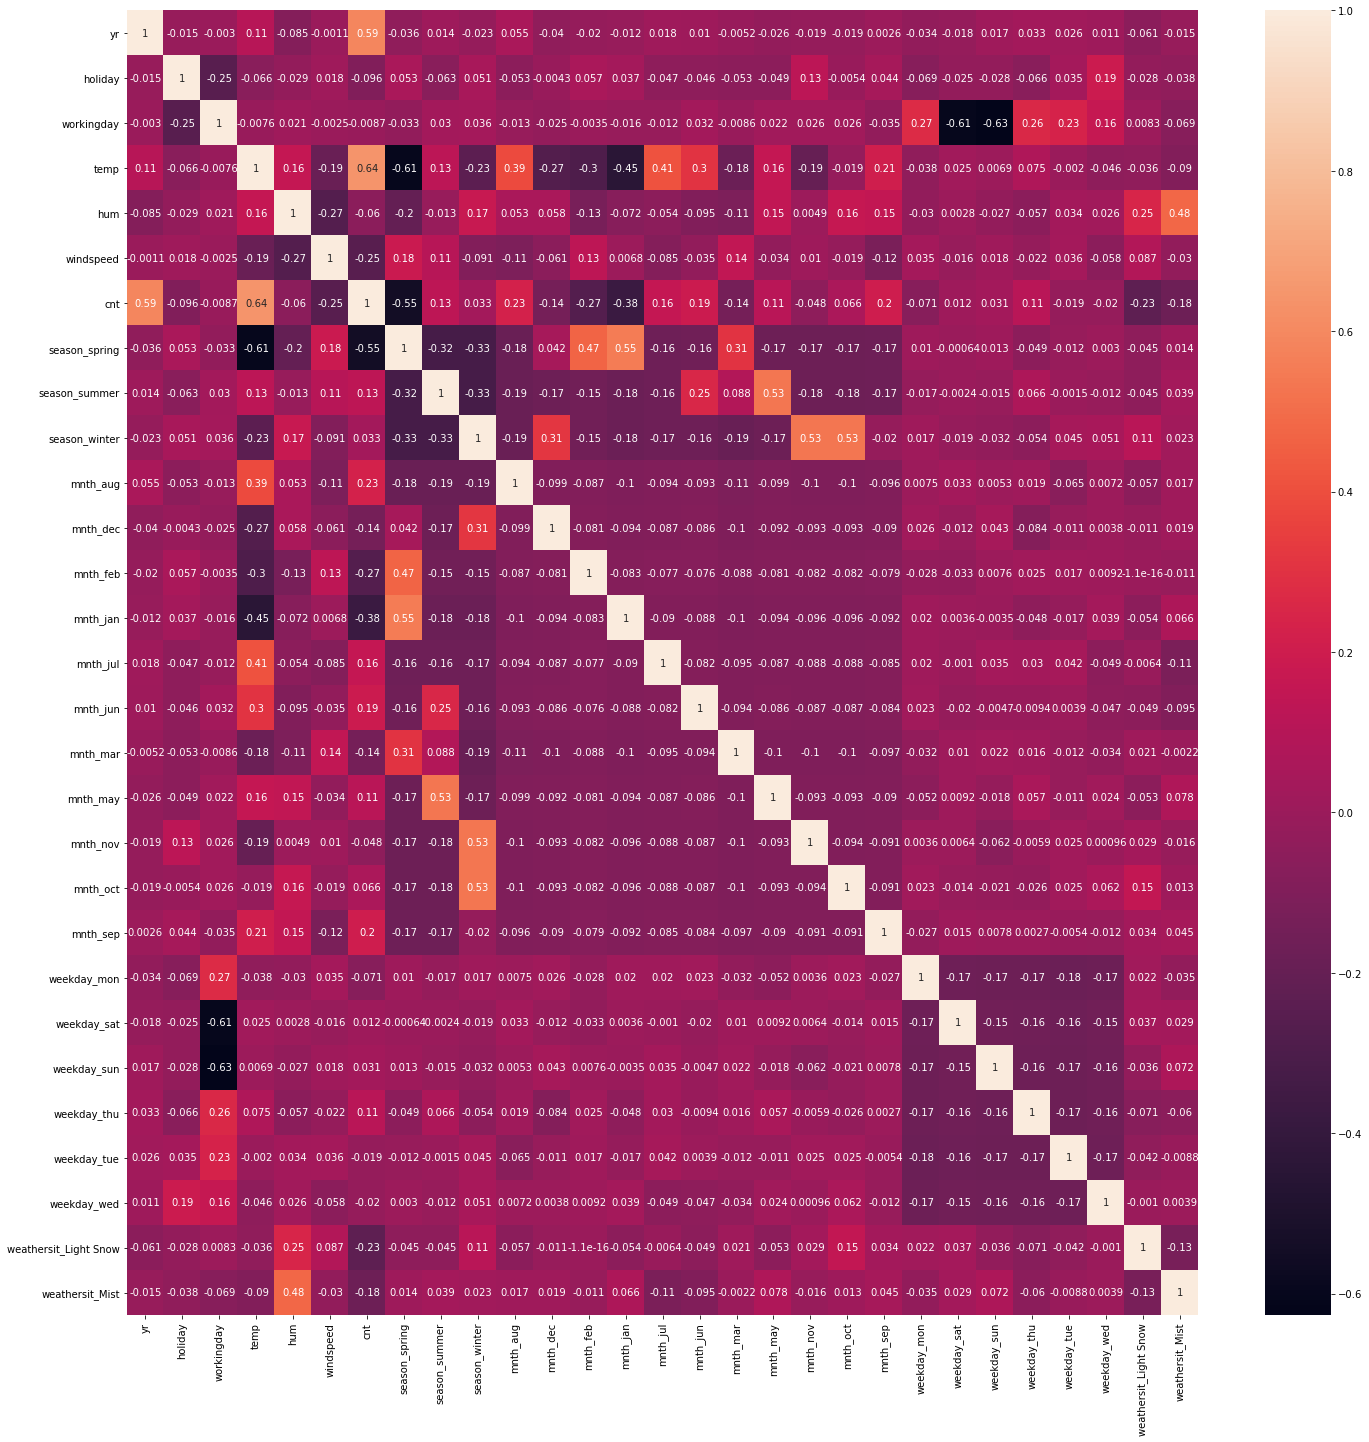

In [31]:
# Heatmap
plt.figure(figsize=(24,24))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

Cnt seems to have a positive correaltion with temp and yr

In [32]:
# Model Building using all features
# Splitting X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
import statsmodels.api as sm

In [34]:
# Adding constant
X_train_sm = sm.add_constant(X_train)

# Fitting the model
lr = sm.OLS(y_train, X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          4.33e-179
Time:                        03:02:10   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_may                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_mon              -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_sat              -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sun              -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thu               0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tue              -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wed              -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

R^2 value comes out to be 85.1%, when all features are taken into consideration.

In [35]:
# Feature selection using RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [36]:
# Selecting 10 features using RFE
lm = LinearRegression()
rfe = RFE(lm,9)

rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_aug', False, 15),
 ('mnth_dec', False, 7),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 5),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 19),
 ('mnth_mar', False, 20),
 ('mnth_may', False, 12),
 ('mnth_nov', False, 6),
 ('mnth_oct', False, 17),
 ('mnth_sep', False, 2),
 ('weekday_mon', False, 14),
 ('weekday_sat', False, 10),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 18),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 16),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', False, 3)]

In [37]:
# selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'weathersit_Light Snow'],
      dtype='object')

In [38]:
# Fitting the model with selected features 
X_train_sm1 = sm.add_constant(X_train[col])

lr1 = sm.OLS(y_train, X_train_sm1).fit()

In [39]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          8.34e-183
Time:                        03:02:10   Log-Likelihood:                 482.70
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     500   BIC:                            -903.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3711      0.031     11.810      0.000       0.309       0.433
yr                        0.2277      0.009     26.715      0.000       0.211       0.244
holiday                  -0.0859      0.027     -3.208      0.001      -0.139      -0.033
temp                      0.5314      0.031     17.041      0.000       0.470       0.593
hum                      -0.2642      0.032     -8.190      0.000      -0.328      -0.201
windspeed                -0.1957      0.026     -7.388      0.000      -0.248      -0.144
season_spring            -0.1022      0.016     -6.566      0.000      -0.133      -0.072
season_winter             0.0638      0.013      4.975      0.000       0.039       0.089
mnth_jul                 -0.0924      0.018     -5.225      0.000      -0.127      -0.058
weathersit_Light Snow    -0.1949      0.026     -7.449      0.000      -0.246      -0.143
==============================================================================
Omnibus:                       51.067   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.596
Skew:                          -0.587   Prob(JB):                     5.27e-23
Kurtosis:                       4.858   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 is 83% and p-value for all the features is significant (less then 0.05)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# Checking VIF
a = X_train_sm1.drop(columns = 'const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                    hum  15.14
2                   temp  12.84
4              windspeed   3.97
5          season_spring   2.38
0                     yr   2.06
6          season_winter   1.97
7               mnth_jul   1.35
8  weathersit_Light Snow   1.11
1                holiday   1.04

VIF for both hum and temp is greater then 5 but we'll start dropping by one column because that can lead to change in other value.

In [42]:
# Dropping 'hum' and updating the model
X_train_sm1.drop(['hum'], axis=1, inplace=True)

In [43]:
X_train_sm2 = sm.add_constant(X_train_sm1)

lr2 = sm.OLS(y_train, X_train_sm2).fit()

In [44]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          2.14e-170
Time:                        03:02:10   Log-Likelihood:                 450.60
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     501   BIC:                            -845.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2038      0.025      8.022      0.000       0.154       0.254
yr                        0.2345      0.009     25.988      0.000       0.217       0.252
holiday                  -0.0812      0.028     -2.851      0.005      -0.137      -0.025
temp                      0.4908      0.033     14.984      0.000       0.426       0.555
windspeed                -0.1399      0.027     -5.136      0.000      -0.193      -0.086
season_spring            -0.1046      0.017     -6.313      0.000      -0.137      -0.072
season_winter             0.0495      0.014      3.664      0.000       0.023       0.076
mnth_jul                 -0.0721      0.019     -3.869      0.000      -0.109      -0.035
weathersit_Light Snow    -0.2521      0.027     -9.397      0.000      -0.305      -0.199
==============================================================================
Omnibus:                       61.400   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.815
Skew:                          -0.702   Prob(JB):                     9.61e-27
Kurtosis:                       4.915   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After Dropping 'hum', R^2 decreased to 80.1% and p-value for remaning features is significant.

In [45]:
# Checking VIF again
b = X_train_sm2.drop(columns = 'const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   temp  3.96
3              windspeed  3.93
0                     yr  2.06
4          season_spring  1.61
5          season_winter  1.37
6               mnth_jul  1.29
7  weathersit_Light Snow  1.06
1                holiday  1.04

VIF for all the features is less then 5 and p-values are significant. So, model seems to be good.

# Residual Analysis

In [46]:
# Predicting value of target variable
y_pred = lr2.predict(X_train_sm2)

In [47]:
# Calculating residuals
residuals = y_train - y_pred

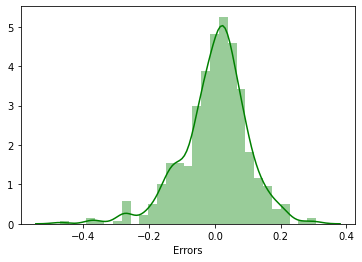

In [48]:
# Plotting distribution for residuals
sns.distplot(residuals,color='g')
plt.xlabel('Errors')
plt.show()

Residuals are following normal distribution with 0 mean.

# Making Predictions Using the Final Model

In [49]:
# Normalizing test dataset using train dataset
df_test[num_var] = scaler.transform(df_test[num_var])

In [50]:
# Splitting X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
# Subsetting columns from test dataset using train dataset 
X_test = X_test[b.columns]

In [52]:
X_test.head()

yr  holiday      temp  windspeed  season_spring  season_winter  mnth_jul  \
184   0        1  0.831783   0.084219              0              0         1   
535   1        0  0.901354   0.153728              0              0         0   
299   0        0  0.511964   0.334206              0              1         0   
221   0        0  0.881625   0.339570              0              0         0   
152   0        0  0.817246   0.537414              0              0         0   

     weathersit_Light Snow  
184                      0  
535                      0  
299                      0  
221                      0  
152                      0

In [53]:
# Adding constant to test dataset
X_test_new = sm.add_constant(X_test)

# Predicting value using train datset
y_pred_test = lr2.predict(X_test_new)

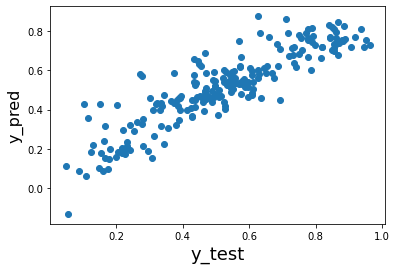

In [54]:
# Plotting y_test and y_pred
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

y_test and y_pred seems to have a positive correlation

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7878462185966709

Final model is having 8 variables where R^2 for test dataset comes out to be 78.78% and for train dataset it's 80.1%.